In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [5]:
data = pd.read_csv('/content/customer_segmentation_data.csv')
data

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


# Data Overview

In [6]:
data.shape

(1000, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [9]:
data.columns

Index(['id', 'age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [10]:
data.dtypes

,0
id,int64
age,int64
gender,object
income,int64
spending_score,int64
membership_years,int64
purchase_frequency,int64
preferred_category,object
last_purchase_amount,float64


In [11]:
data.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


In [12]:
data.duplicated().sum()

0

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.50000,288.819436,1.0,250.7500,500.500,750.25,1000.00
age,1000.0,43.78300,15.042213,18.0,30.0000,45.000,57.00,69.00
income,1000.0,88500.80000,34230.771122,30004.0,57911.7500,87845.500,116110.25,149973.00
spending_score,1000.0,50.68500,28.955175,1.0,26.0000,50.000,76.00,100.00
membership_years,1000.0,5.46900,2.855730,1.0,3.0000,5.000,8.00,10.00
purchase_frequency,1000.0,26.59600,14.243654,1.0,15.0000,27.000,39.00,50.00
last_purchase_amount,1000.0,492.34867,295.744253,10.4,218.7625,491.595,747.17,999.74


In [20]:
data['preferred_category'].count()

1000

In [22]:
product_counts = data['preferred_category'].value_counts()
product_counts

,count
preferred_category,
Electronics,215
Sports,210
Home & Garden,206
Groceries,199
Clothing,170


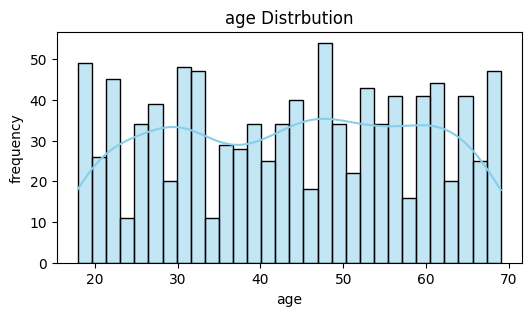

In [28]:
plt.figure(figsize=(6,3))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('age Distrbution')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

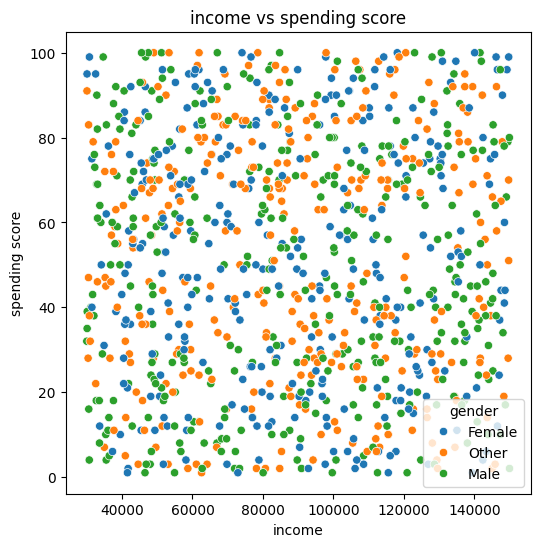

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='income', y='spending_score', data=data, hue='gender')
plt.title('income vs spending score')
plt.xlabel('income')
plt.ylabel('spending score')
plt.show()

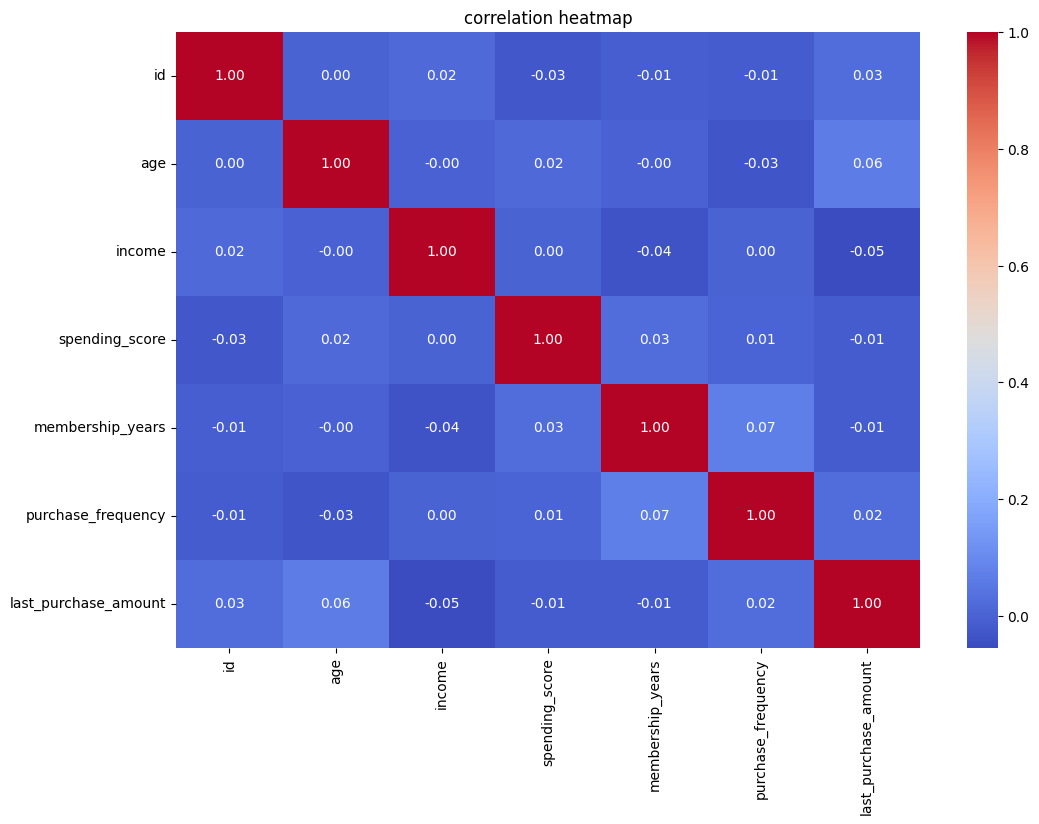

In [31]:
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap')
plt.show()

# model

In [35]:
X = data[['age', 'income', 'membership_years', 'purchase_frequency', 'last_purchase_amount']]
y = data['spending_score']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'mean square error: {mse}')
print(f'mean square error: {r2}')

mean square error: 802.810749355414
mean square error: -0.011714680438657199


In [36]:
df = data.copy()

# Clustering customers based on their attributes to identify distinct segments.

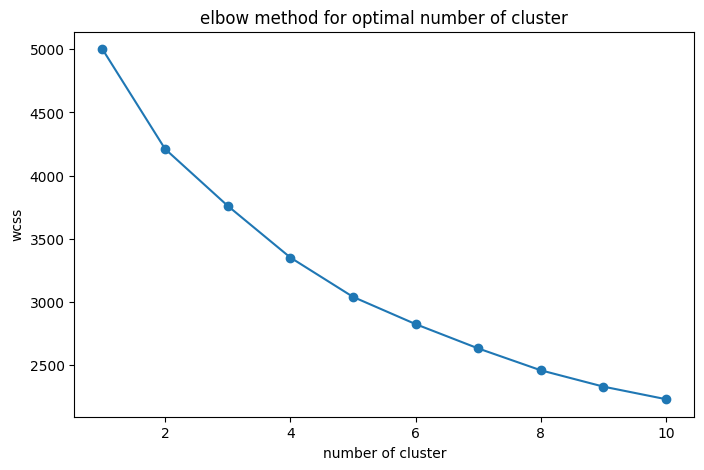

In [40]:
features = ['age', 'income', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss, marker='o')
plt.title('elbow method for optimal number of cluster')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()


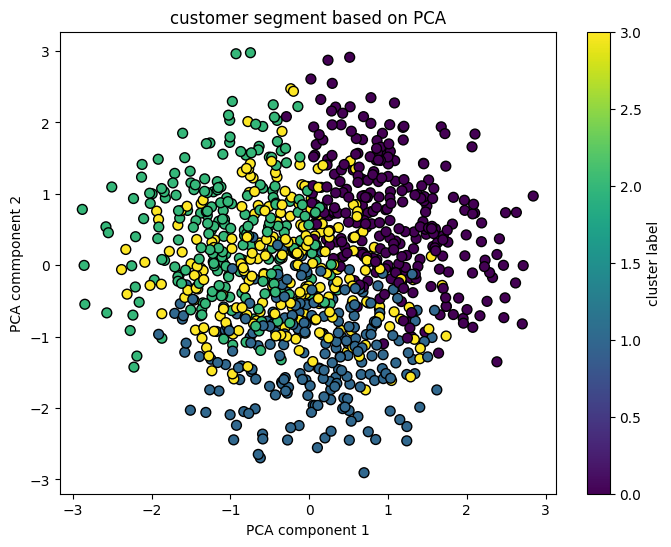

In [43]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters= kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c=clusters, cmap='viridis',marker='o',edgecolors='k', s=50)
plt.title('customer segment based on PCA')
plt.xlabel('PCA component 1')
plt.ylabel('PCA commponent 2')
plt.colorbar(label='cluster label')
plt.show()

In [46]:
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary

,age,income,membership_years,purchase_frequency,last_purchase_amount
cluster,,,,,
0,53.978339,71188.660650,6.480144,30.888087,732.568087
1,35.380952,78178.003968,6.845238,30.884921,212.486468
2,55.384615,112976.940171,3.991453,20.290598,334.696624
3,29.345992,95544.641350,4.282700,23.244726,664.817342


#  Analyzing the impact of different categories on spending behavior.

In [47]:
category_impact = df.groupby('preferred_category')[['spending_score','last_purchase_amount']].mean()
category_impact

,spending_score,last_purchase_amount
preferred_category,,
Clothing,51.976471,489.648412
Electronics,50.297674,496.632279
Groceries,51.256281,487.279397
Home & Garden,49.135922,505.600631
Sports,51.014286,481.953190
